## Preparing data

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
A_man = 5 * np.random.randn(101) + 178.5
B_man = 5 * np.random.randn(101) + 179.9

세션자료의 예시와 비슷한 데이터를 만듭니다.

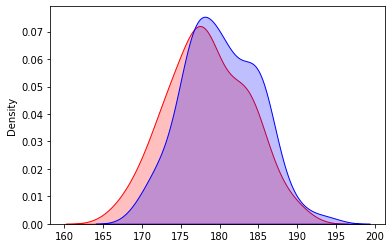

In [ ]:
sns.kdeplot(data=A_man, color="red", shade=True)
sns.kdeplot(data=B_man, color="blue", shade=True)
plt.show()

## t-test

In [ ]:
from scipy import stats

### One sample t-test

In [ ]:
t_stat, p_value = stats.ttest_1samp(A_man, 178.5)
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -0.22787277117478616, p-value : 0.8202104280464514


p-value > 0.05이므로 귀무가설을 기각할 수 없고

A대학의 남학생 평균키를 178.5cm라고 말할 수 있습니다.

In [ ]:
t_stat, p_value = stats.ttest_1samp(B_man, 179.9)
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.4545196994020961, p-value : 0.6504399156555684


p-value > 0.05이므로 귀무가설을 기각할 수 없고

B대학의 남학생 평균키를 179.9cm라고 말할 수 있습니다.

### Two sample t-test

In [ ]:
t_stat, p_value = stats.ttest_ind(A_man, B_man, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -2.4809509135259113, p-value : 0.01392832955482604


p-value < 0.05이므로 귀무가설을 기각할 수 있고

A대학과 B대학의 남학생 평균 키의 차이는 유의미하다는 결론을 내릴 수 있습니다.

## ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
C_man = 5 * np.random.randn(101) + 181.9

In [ ]:
ABC = pd.DataFrame({'A_man':A_man,'B_man':B_man,'C_man':C_man})
ABC

,A_man,B_man,C_man
0,178.847908,184.138133,183.204257
1,182.802279,180.015719,174.110634
2,189.293421,184.544735,196.766061
3,177.998868,171.538382,181.269170
4,173.818440,185.219547,186.170393
...,...,...,...
96,173.467716,181.285150,192.299365
97,173.102514,188.729903,182.310656
98,166.291599,185.676776,178.455026
99,174.228024,181.400115,182.194109


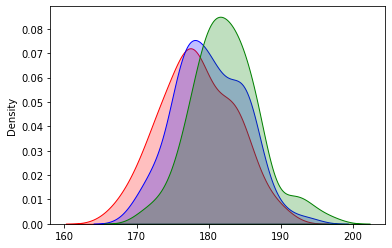

In [ ]:
sns.kdeplot(data=A_man, color="red", shade=True)
sns.kdeplot(data=B_man, color="blue", shade=True)
sns.kdeplot(data=C_man, color="green", shade=True)
plt.show()

### ANOVA assumption

In [ ]:
# 정규성 검정 Shaprio
print(stats.shapiro( A_man ))
print(stats.shapiro( B_man ))
print(stats.shapiro( C_man ))

ShapiroResult(statistic=0.9919572472572327, pvalue=0.8133426904678345)
ShapiroResult(statistic=0.9885125756263733, pvalue=0.5394450426101685)
ShapiroResult(statistic=0.9814658164978027, pvalue=0.16784195601940155)


정규성 검정 : H0 : 정규성 / H1 : not 정규성

p-value > 0.05이므로 귀무가설을 기각할 수 없고,

정규성 가정이 성립합니다.

In [ ]:
# 왜도 검사
print('skewness test: {}'.format( round(abs(stats.skew( A_man , bias = False) ),4) ) , sep = '\n')
print('skewness test: {}'.format( round(abs(stats.skew( B_man , bias = False) ),4) ) , sep = '\n')
print('skewness test: {}'.format( round(abs(stats.skew( C_man , bias = False) ),4) ) , sep = '\n')

skewness test: 0.0452
skewness test: 0.1517
skewness test: 0.407


정규성 검정 : skewness가 2를 넘지 않으니 정규분포를 따른다고 봅니다.

In [ ]:
from scipy.stats import bartlett

print(stats.bartlett( A_man, B_man, C_man))
 
print(stats.levene( A_man, B_man, C_man))

BartlettResult(statistic=1.0006953311333728, pvalue=0.6063198265389529)
LeveneResult(statistic=0.8641055562270308, pvalue=0.42247451829634564)


등분산 검정 : H0 : 등분산 / H1 : not 등분산

p-value > 0.05이므로 귀무가설을 기각할 수 없고,

등분산 가정이이 성립합니다.

연속형 변수에서 독립성 검정은 통계량이 아닌 분석 설계단계에서 고려합니다.

### One-way ANOVA

In [ ]:
F, p = stats.f_oneway(A_man, B_man, C_man)
print( 'F-Ratio: {}'.format(F)
    , 'p-value:{}'.format(p)
     , sep = '\n')

F-Ratio: 16.421131793497903
p-value:1.707725937052553e-07


p-value < 0.05 이므로 귀무가설을 기각할 수 있고,

A, B, C 대학 중 적어도 한 대학의 남학생 키는 다른 대학들과 다릅니다.



---



ANOVA를 수행하는 두번째 방법으로 **ols**를 활용해보겠습니다.

ols를 활용하면 보다 보기 좋은 Reporting을 할 수 있다는 점이 장점입니다.

대신 세 그룹의 데이터를 하나의 테이블로 만들어주어야 합니다.

In [ ]:
A_man_df = pd.DataFrame({"height":A_man, "ABC":["A"]*101})
B_man_df = pd.DataFrame({"height":B_man, "ABC":["B"]*101})
C_man_df = pd.DataFrame({"height":C_man, "ABC":["C"]*101})

ABC_man = pd.concat([A_man_df, B_man_df, C_man_df], ignore_index=True)
ABC_man

,height,ABC
0,178.847908,A
1,182.802279,A
2,189.293421,A
3,177.998868,A
4,173.818440,A
...,...,...
298,192.299365,C
299,182.310656,C
300,178.455026,C
301,182.194109,C


In [ ]:
model = ols('height ~ C(ABC)', ABC_man).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(ABC),2.0,779.84331,389.921655,16.421132,1.707726e-07
Residual,300.0,7123.53436,23.745115,NaN,NaN


p-value < 0.05 이므로 귀무가설을 기각할 수 있고,

A, B, C 대학 중 적어도 한 대학의 남학생 키는 다른 대학들과 다릅니다.

### Two-way ANOVA

In [ ]:
# 세션자료에 있는 데이터와 동일한 데이터를 만듭니다.
cold_medicine = pd.DataFrame({"medicine":["A"]*8+["B"]*8+["placebo"]*8, "go_out":list(["rare"]*4+["often"]*4)*3, "days":[4,5,6,5,6,6,4,4,7,9,8,8,10,12,11,11,12,13,10,13,13,15,12,12]})
cold_medicine

,medicine,go_out,days
0,A,rare,4
1,A,rare,5
2,A,rare,6
3,A,rare,5
4,A,often,6
5,A,often,6
6,A,often,4
7,A,often,4
8,B,rare,7
9,B,rare,9


In [ ]:
model = ols('days ~ C(medicine) + C(go_out) + C(medicine):C(go_out)', data=cold_medicine).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(medicine),228.000000,2.0,93.272727,3.164784e-10
C(go_out),10.666667,1.0,8.727273,8.489086e-03
C(medicine):C(go_out),9.333333,2.0,3.818182,4.147102e-02
Residual,22.000000,18.0,NaN,NaN


감기약과 외출빈도 모두 p-value < 0.05 이므로 귀무가설을 기각할 수 있을 뻔 했지만

두 요인의 상호작용효과의 p-value도 < 0.05여서 두 요인의 효과에 대한 결론을 내릴 수 없습니다.

상호작용효과가 없으면 어떤 감기약을 썼을 때 차이가 있고, 외출을 자주or드물게 해야 차이가 있고를 보는 사후검정을 할텐데

상호작용효과가 있으면 사후검정 표를 보면 꽤 복잡합니다. (할거면 jamovi 추천)

## Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api

### Simple Regression

In [ ]:
# 데이터 생성
x = np.linspace(0,100,201)
e = 50 * np.random.randn(201)
y = [2*x[i] + e[i]  for i in range(201)]

In [ ]:
reg_ex = pd.DataFrame({"x":x, "y":y})
reg_ex.head()

,x,y
0,0.0,36.156945
1,0.5,-116.720594
2,1.0,-66.611478
3,1.5,37.285673
4,2.0,-10.241158


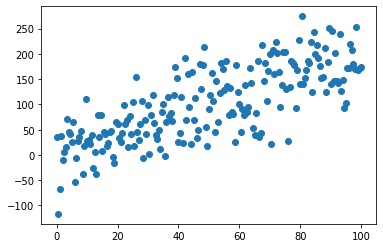

In [ ]:
plt.plot(reg_ex["x"],reg_ex["y"],"o")
plt.show()

In [ ]:
line_fitter = LinearRegression()
line_fitter.fit(reg_ex["x"].values.reshape(-1,1), reg_ex["y"])

LinearRegression()

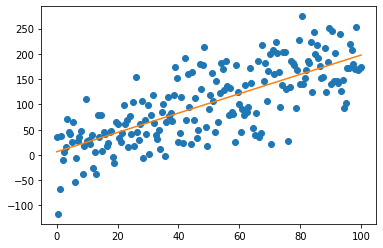

In [ ]:
plt.plot(reg_ex["x"], reg_ex["y"], 'o')
plt.plot(reg_ex["x"],line_fitter.predict(reg_ex["x"].values.reshape(-1,1)))
plt.show()

In [ ]:
# 개별 x값에 대한 y예측
line_fitter.predict([[75]])

array([149.83202999])

In [ ]:
# 추세선의 기울기와 절편
print(line_fitter.intercept_, line_fitter.coef_)

6.291671605500966 [1.91387145]


In [ ]:
mod = statsmodels.formula.api.ols('y ~ x', data=reg_ex)
reg_result = mod.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     263.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.72e-38
Time:                        15:14:08   Log-Likelihood:                -1064.4
No. Observations:                 201   AIC:                             2133.
Df Residuals:                     199   BIC:                             2139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2917      6.816      0.923      0.3

## Sampling

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import uniform

### Rejection sampling

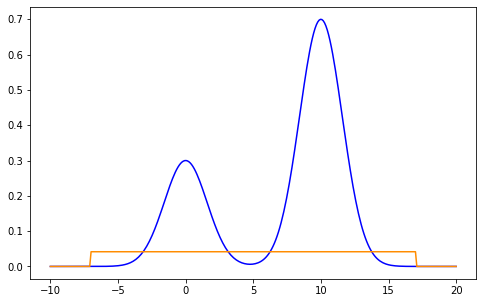

In [ ]:
x = np.linspace(-10, 20, 300)
plt.figure(figsize=(8, 5))
plt.plot(x, 0.3*np.exp(-0.2*(x**2)) + 0.7*np.exp(-0.2*(x-10)**2) , color='b')
plt.plot(x, uniform.pdf(x, -7, 24), color='darkorange')
plt.show()

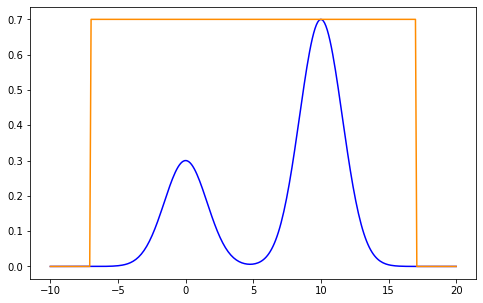

In [ ]:
x = np.linspace(-10, 20, 300)
plt.figure(figsize=(8, 5))
plt.plot(x, 0.3*np.exp(-0.2*(x**2)) + 0.7*np.exp(-0.2*(x-10)**2) , color='b')
plt.plot(x, 0.7/(1/24) *uniform.pdf(x, -7, 24), color='darkorange')
plt.show()

In [ ]:
xdomain = [-7, 17]

def random_point_within_enveloping_region():
    """
    """
    x = random.uniform(xdomain[0], xdomain[1])
    y = random.uniform(0, 0.7)
    return (x,y)

In [ ]:
#Number of sample points to sample
n = 10000

In [ ]:
#Creating two arrays to capture accepted and rejected points
accepted = []
rejected = []

In [ ]:
#Run this loop until we got required number of valid points
while len(accepted) < n:
 
    #Get random point
    x, y = random_point_within_enveloping_region()
 
    #If y is below blue curve then accept it
    if y < 0.3*np.exp(-0.2*(x**2)) + 0.7*np.exp(-0.2*(x-10)**2):
       accepted.append((x, y))
    #otherwise reject it.
    else:
       rejected.append((x, y))

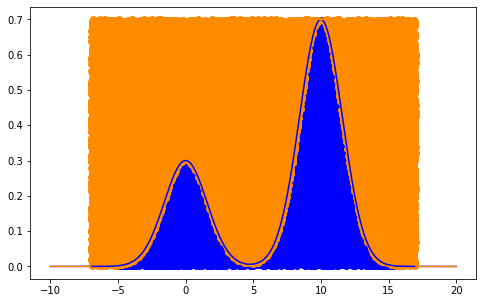

In [ ]:
#Plot the graph
x = np.linspace(-10, 20, 1000)
plt.figure(figsize=(8, 5))
plt.plot([x[0] for x in accepted], [x[1] for x in accepted] , 'ro', color='b') # Plot Accepted Points
plt.plot([x[0] for x in rejected], [x[1] for x in rejected] , 'ro', color='darkorange') # Plot Rejected Points
plt.plot(x, 0.3*np.exp(-0.2*(x**2)) + 0.7*np.exp(-0.2*(x-10)**2) , color='b')
plt.plot(x, 0.7/(1/24) *uniform.pdf(x, -7, 24), color='darkorange')
plt.show()

### Rejection sampling 예시

우리가 주사위를 굴린다고 하면, 1~6에 대해 등장할 확률이 1/6로 동일하다는 것을 알고 있습니다.

하지만 우리가 "주사위"를 갖고 있지 않아서, 확률 분포에서 샘플링(sampling)을 진행할 수 없는 상황이라고 가정해보겠습니다.

반면에 우리에게 주사위 대신 "동전"이 있다고 할게요.

우리가 동전을 던지면 앞면(1), 뒷면(0)이 등장할 확률이 1/2로 동일합니다.

이때 "동전"을 가지고 "주사위"를 던지는 것과 동일한 시행을 할 수 있게 해주는 것이 Rejection sampling입니다.

---

step1. 동전을 3번 던져서 아래와 같은 방식으로 0-7이라는 숫자를 만듭니다.

앞앞앞0 / 앞앞뒤1 / 앞뒤앞2/ 뒤앞앞3 / 뒤뒤앞4 / 뒤앞뒤5 / 앞뒤뒤6/ 뒤뒤뒤7

모든 경우는 발생할 확률이 동일하게 1/8입니다.

step2. 숫자가 0 또는 7이면 (동전이 같은 방향 3번) reject하고 다시 resampling합니다 (동전을 3번 던집니다)

step3. 숫자가 1~6이면 해당 숫자를 주사위에서 나온 숫자’처럼’ 간주합니다.

In [ ]:
def coin():
    return random.randint(0, 1)

In [ ]:
def three():
    out = coin()
    out = out * 2 + coin()
    out = out * 2 + coin()
    return out

In [ ]:
def dice():
    number = three()
    while number == 0 or number == 7:
        number = three()
    return number

In [ ]:
for i in range(10):
    print('Dice:', dice())

Dice: 2
Dice: 2
Dice: 6
Dice: 2
Dice: 4
Dice: 4
Dice: 1
Dice: 2
Dice: 4
Dice: 2


### Reservoir sampling

In [ ]:
import random
import sys

In [ ]:
def reservoir_sampling(sampled_num, total_num):
    sample = []
    for i in range(0, total_num):
        if i < sampled_num:
            sample.append(i)
        else:
            r = random.randint(0, i)
            if r < sampled_num:
                sample[r] = i
    return sample

In [ ]:
reservoir_sampling(10000,10000000)